<a href="https://colab.research.google.com/github/yusuf601/ANALISIS-DATA-STUDENT-PERFORMANCE/blob/main/WEB%20SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup as bs
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
import seaborn as sns

In [2]:
page = 1
while page != 51:
      url = f"https://www.goodreads.com/list/show/3810.Best_Cozy_Mystery_Series?page={page}"
      print(url)
      page = page + 1

https://www.goodreads.com/list/show/3810.Best_Cozy_Mystery_Series?page=1
https://www.goodreads.com/list/show/3810.Best_Cozy_Mystery_Series?page=2
https://www.goodreads.com/list/show/3810.Best_Cozy_Mystery_Series?page=3
https://www.goodreads.com/list/show/3810.Best_Cozy_Mystery_Series?page=4
https://www.goodreads.com/list/show/3810.Best_Cozy_Mystery_Series?page=5
https://www.goodreads.com/list/show/3810.Best_Cozy_Mystery_Series?page=6
https://www.goodreads.com/list/show/3810.Best_Cozy_Mystery_Series?page=7
https://www.goodreads.com/list/show/3810.Best_Cozy_Mystery_Series?page=8
https://www.goodreads.com/list/show/3810.Best_Cozy_Mystery_Series?page=9
https://www.goodreads.com/list/show/3810.Best_Cozy_Mystery_Series?page=10
https://www.goodreads.com/list/show/3810.Best_Cozy_Mystery_Series?page=11
https://www.goodreads.com/list/show/3810.Best_Cozy_Mystery_Series?page=12
https://www.goodreads.com/list/show/3810.Best_Cozy_Mystery_Series?page=13
https://www.goodreads.com/list/show/3810.Best_C

In [3]:
page = 1
names = []
ratings = []
avgscores = []
author=[]
score=[]
votes=[]
while page != 51:
    url = f"https://www.goodreads.com/list/show/3810.Best_Cozy_Mystery_Series?page={page}"
    response = requests.get(url)
    html = response.content
    soup = bs(html, "html.parser")
    book_containers = soup.find_all('tr', itemtype="http://schema.org/Book")
    for container in book_containers:
        if container.find('td', width= '100%') is not None:
            name = container.find('a',class_="bookTitle").text.strip()
            names.append(name)
            authors = container.find('a',class_="authorName").text.strip()
            author.append(authors)
            scoring = container.find('span',class_="greyText smallText uitext").text.strip().split()
            ascores=scoring[0]
            avgscores.append(ascores)
            rates = scoring[4]
            ratings.append(rates)
            voted= container.find('span',class_="smallText uitext").text.strip().split()
            scores=voted[1]
            score.append(scores)
            vote=voted[3]
            votes.append(vote)
    page = page + 1

In [4]:
goodreads = pd.DataFrame({'book title': names,
'ratings': ratings,
'avg_score': avgscores,
'author': author,
'score': score,
 'votes':votes
})
goodreads

,book title,ratings,avg_score,author,score,votes
0,"Murder at the Vicarage (Miss Marple, #2)","187,740",4.05,Agatha Christie,"27,052,",275
1,"Chocolate Chip Cookie Murder (Hannah Swensen, #1)","62,256",3.69,Joanne Fluke,"24,435,",251
2,The Mysterious Affair at Styles (Hercule Poiro...,avg,really,Agatha Christie,"21,919,",225
3,The Sweetness at the Bottom of the Pie (Flavia...,"168,236",3.82,Alan Bradley,"21,422,",221
4,The No. 1 Ladies' Detective Agency (No. 1 Ladi...,"264,363",3.81,Alexander McCall Smith,"20,750,",214
...,...,...,...,...,...,...
2186,"The Maine Mutiny (Murder, She Wrote, #23)","1,179",3.88,Jessica Fletcher,"3,",1
2187,The Mad Catter (Whales and Tails #2),991,4.30,Kathi Daley,"2,",1
2188,"Destination Murder (Murder, She Wrote, #20)",881,3.98,Jessica Fletcher,"2,",1
2189,Resurrection in Mudbug (Ghost-in-Law #4),"4,860",4.33,Jana Deleon,"1,",1


In [5]:
goodreads.to_csv('goodreads.csv',index=False)
pd.read_csv('goodreads.csv')

,book title,ratings,avg_score,author,score,votes
0,"Murder at the Vicarage (Miss Marple, #2)","187,740",4.05,Agatha Christie,"27,052,",275
1,"Chocolate Chip Cookie Murder (Hannah Swensen, #1)","62,256",3.69,Joanne Fluke,"24,435,",251
2,The Mysterious Affair at Styles (Hercule Poiro...,avg,really,Agatha Christie,"21,919,",225
3,The Sweetness at the Bottom of the Pie (Flavia...,"168,236",3.82,Alan Bradley,"21,422,",221
4,The No. 1 Ladies' Detective Agency (No. 1 Ladi...,"264,363",3.81,Alexander McCall Smith,"20,750,",214
...,...,...,...,...,...,...
2186,"The Maine Mutiny (Murder, She Wrote, #23)","1,179",3.88,Jessica Fletcher,"3,",1
2187,The Mad Catter (Whales and Tails #2),991,4.30,Kathi Daley,"2,",1
2188,"Destination Murder (Murder, She Wrote, #20)",881,3.98,Jessica Fletcher,"2,",1
2189,Resurrection in Mudbug (Ghost-in-Law #4),"4,860",4.33,Jana Deleon,"1,",1


In [6]:
goodreads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   book title  2191 non-null   object
 1   ratings     2191 non-null   object
 2   avg_score   2191 non-null   object
 3   author      2191 non-null   object
 4   score       2191 non-null   object
 5   votes       2191 non-null   object
dtypes: object(6)
memory usage: 102.8+ KB


**PREPROCESSING**

In [7]:
print(len(goodreads))

2191


In [9]:
goodreads["votes"] = goodreads["votes"].astype(int)

In [10]:
goodreads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   book title  2191 non-null   object
 1   ratings     2191 non-null   object
 2   avg_score   2191 non-null   object
 3   author      2191 non-null   object
 4   score       2191 non-null   object
 5   votes       2191 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 102.8+ KB


**DATA WRANGLING**

In [11]:
# Menghitung jumlah rating untuk setiap buku
book_counts = goodreads["book title"].value_counts()

# Mengurutkan berdasarkan jumlah rating
fav_books = book_counts.sort_values(ascending=False)
print(len(fav_books))


2191


In [12]:
print("buku yang paling di sukai:", fav_books)

buku yang paling di sukai: Murder at the Vicarage (Miss Marple, #2)            1
The Murder of Roger Ackroyd (Hercule Poirot, #4)    1
Crocodile on the Sandbank (Amelia Peabody, #1)      1
Real Murders (Aurora Teagarden, #1)                 1
Dead Until Dark (Sookie Stackhouse, #1)             1
                                                   ..
The Mad Catter (Whales and Tails #2)                1
Destination Murder (Murder, She Wrote, #20)         1
Resurrection in Mudbug (Ghost-in-Law #4)            1
Costume Catastrophe (Zoe Donovan Mystery #21)       1
The Fine Art of Murder (Murder, She Wrote, #36)     1
Name: book title, Length: 2191, dtype: int64


In [13]:
# Menyortir data berdasarkan kolom "Votes"
top = goodreads.sort_values(by="votes", ascending=False)

# Mendapatkan 5 buku pertama
top_5_books = top.head(5)
print(top_5_books)

                                          book title  ratings avg_score  \
0           Murder at the Vicarage (Miss Marple, #2)  187,740      4.05   
1  Chocolate Chip Cookie Murder (Hannah Swensen, #1)   62,256      3.69   
2  The Mysterious Affair at Styles (Hercule Poiro...      avg    really   
3  The Sweetness at the Bottom of the Pie (Flavia...  168,236      3.82   
4  The No. 1 Ladies' Detective Agency (No. 1 Ladi...  264,363      3.81   

                   author    score  votes  
0         Agatha Christie  27,052,    275  
1            Joanne Fluke  24,435,    251  
2         Agatha Christie  21,919,    225  
3            Alan Bradley  21,422,    221  
4  Alexander McCall Smith  20,750,    214  


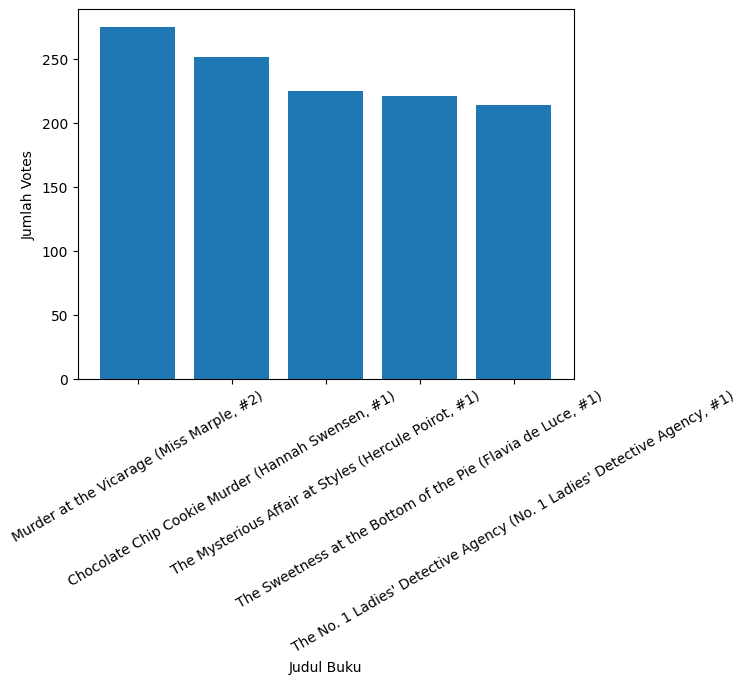

In [14]:
titles = top_5_books["book title"]
votes = top_5_books["votes"]
# Membuat bar chart
plt.bar(titles, votes)
plt.xticks(rotation=30)
# Menambahkan label
plt.xlabel("Judul Buku")
plt.ylabel("Jumlah Votes")

# Menampilkan plot
plt.show()

In [15]:
# Menghitung jumlah buku untuk setiap author
author_counts = goodreads["author"].value_counts()

# Menyortir author berdasarkan jumlah buku
author_counts = author_counts.sort_values(ascending=False)

# Mendapatkan 5 author dengan buku terbanyak
top_5_authors = author_counts.head(5)

# Menampilkan nama author dan jumlah bukunya
for author, count in top_5_authors.items():
    print(f"{author}: {count}")

Agatha Christie: 43
Charlaine Harris: 31
Donna Andrews: 30
Janet Evanovich: 29
Rhys Bowen: 27


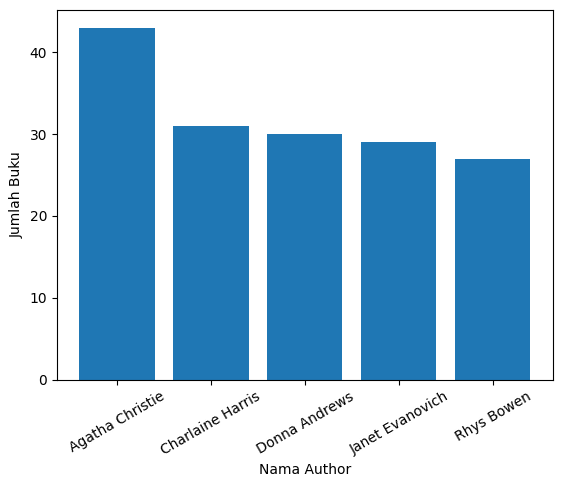

In [16]:
authors = top_5_authors.index
counts = top_5_authors.values

# Membuat bar chart
plt.bar(authors, counts)
plt.xticks(rotation=30)
# Menambahkan label
plt.xlabel("Nama Author")
plt.ylabel("Jumlah Buku")

# Menampilkan plot
plt.show()

In [17]:
goodreads.head()

,book title,ratings,avg_score,author,score,votes
0,"Murder at the Vicarage (Miss Marple, #2)","187,740",4.05,Agatha Christie,"27,052,",275
1,"Chocolate Chip Cookie Murder (Hannah Swensen, #1)","62,256",3.69,Joanne Fluke,"24,435,",251
2,The Mysterious Affair at Styles (Hercule Poiro...,avg,really,Agatha Christie,"21,919,",225
3,The Sweetness at the Bottom of the Pie (Flavia...,"168,236",3.82,Alan Bradley,"21,422,",221
4,The No. 1 Ladies' Detective Agency (No. 1 Ladi...,"264,363",3.81,Alexander McCall Smith,"20,750,",214


In [18]:
# Menentukan kolom yang akan diambil
a = ["votes", "author"]

# Membuat dataframe baru
df = goodreads[a]

In [20]:
df.head()

,votes,author
0,275,Agatha Christie
1,251,Joanne Fluke
2,225,Agatha Christie
3,221,Alan Bradley
4,214,Alexander McCall Smith
